In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import os

In [28]:
os.chdir("D:\VS code Projects\medical insurance")

In [29]:
df = pd.read_csv("data\insurance.csv")

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

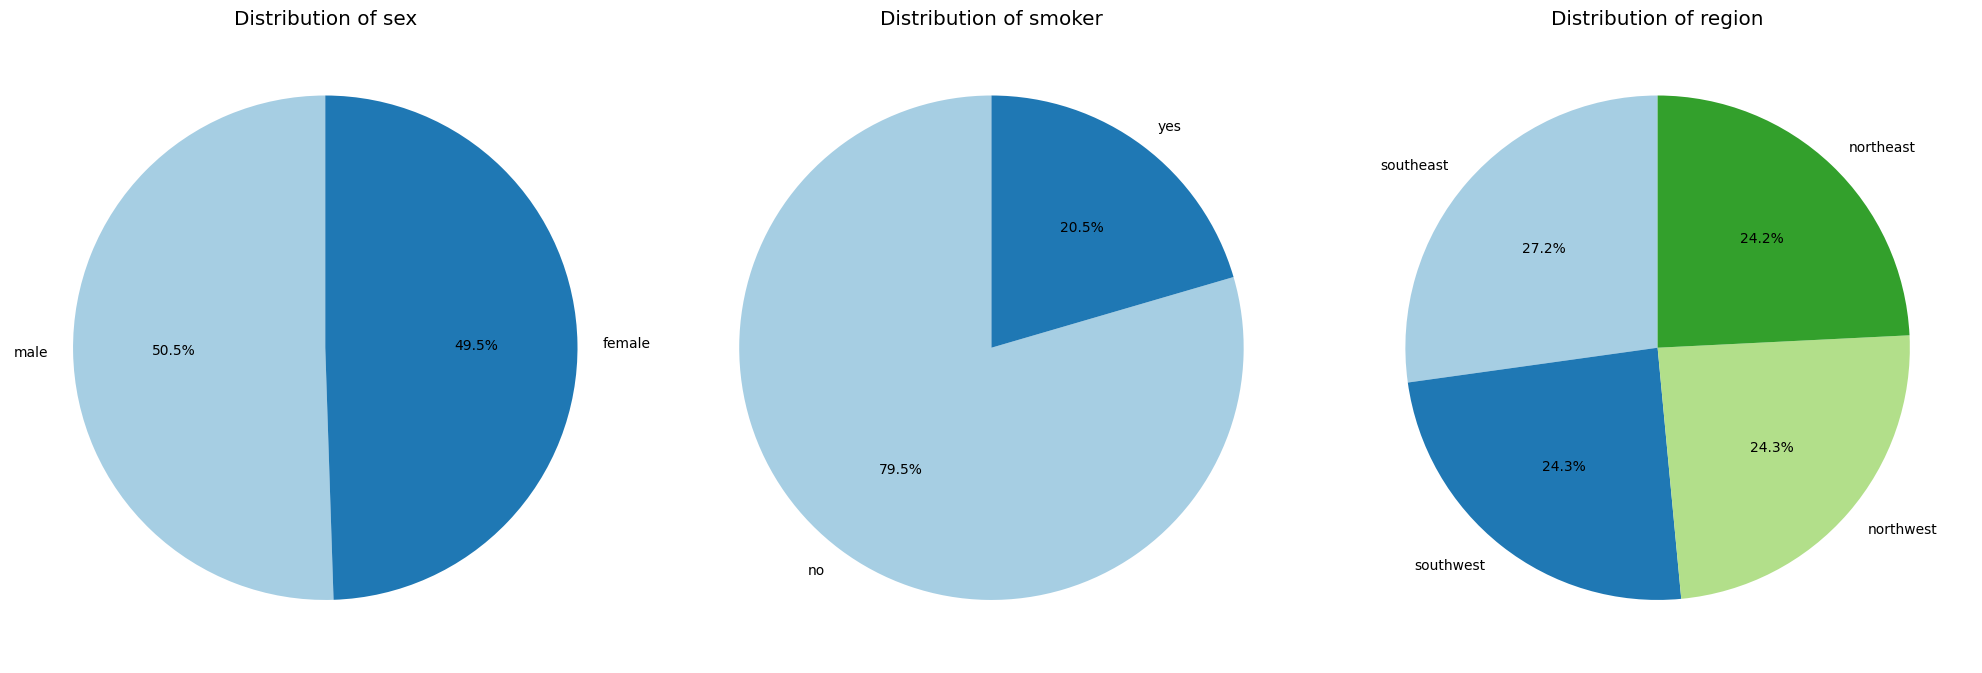

In [43]:

features = ['sex', 'smoker', 'region']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for i, col in enumerate(features):
    x = df[col].value_counts()
    
    # Assign each pie chart to a subplot
    axes[i].pie(x.values, labels=x.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
    
    # Set title for each pie chart
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


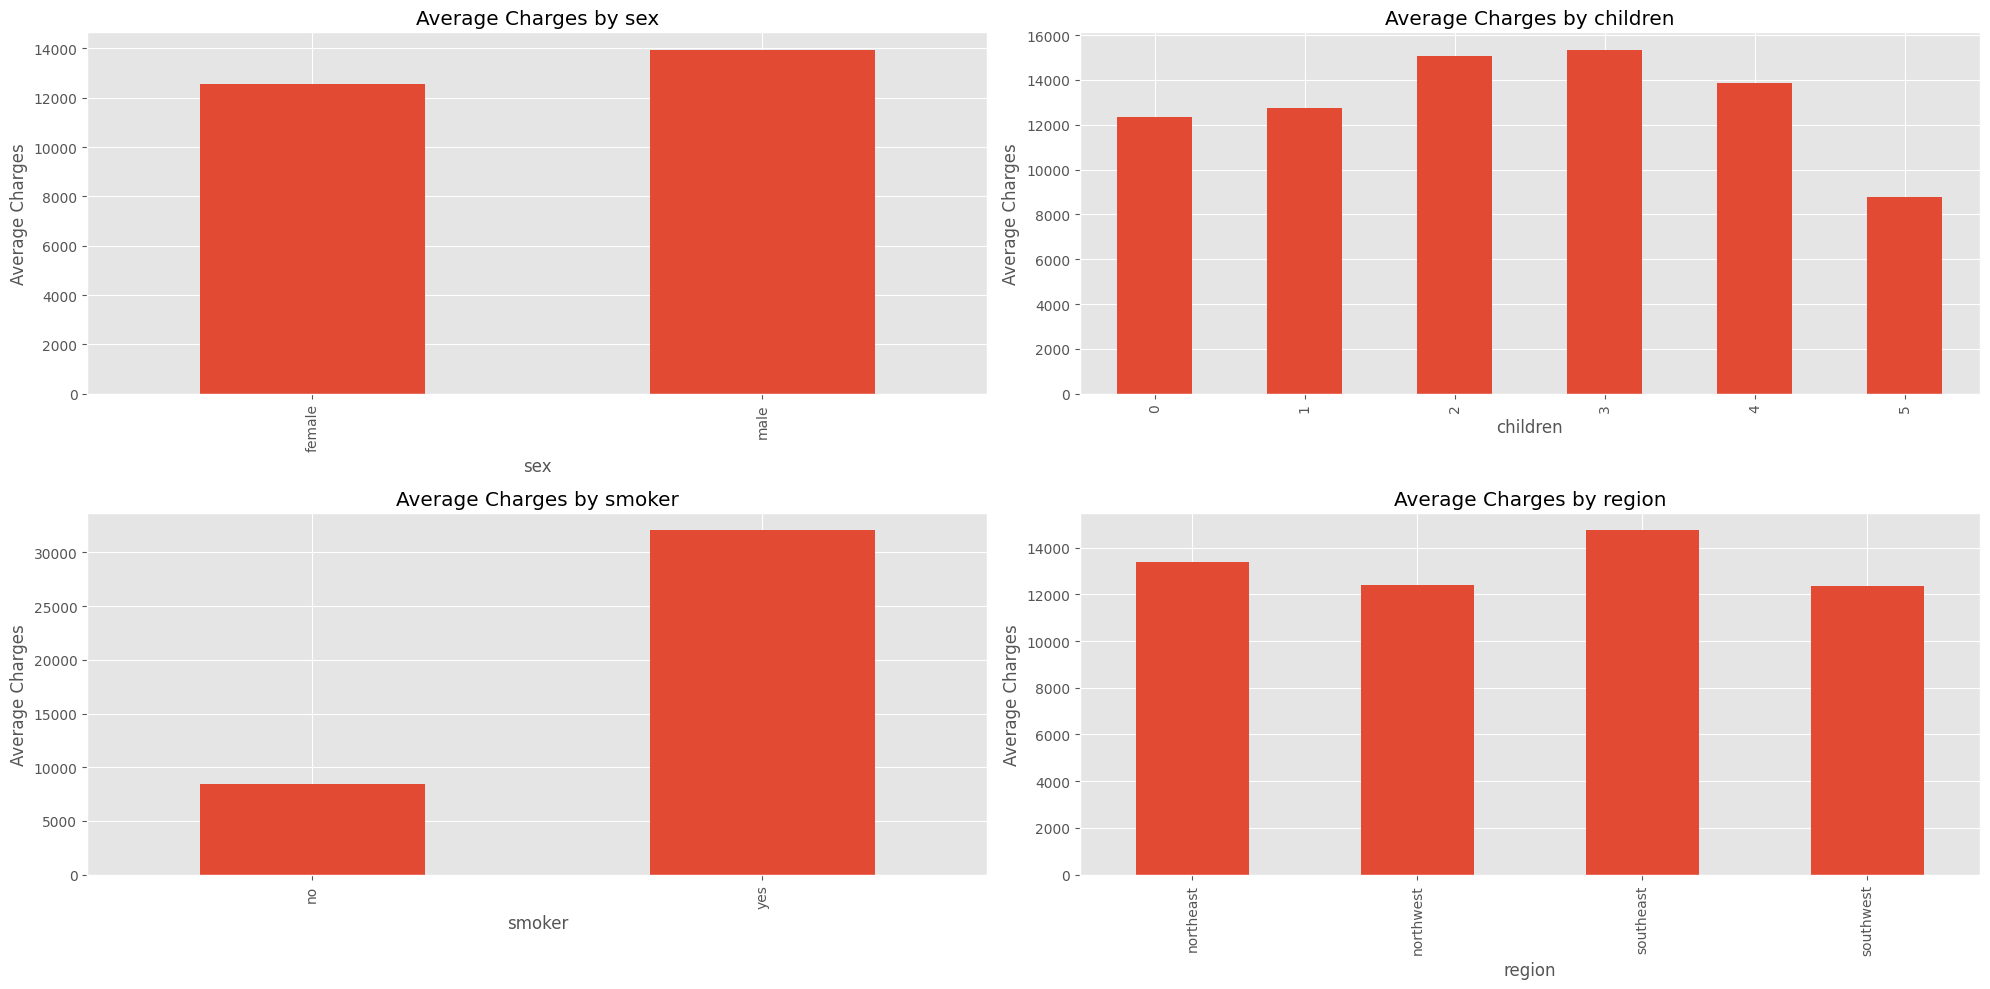

In [42]:


features = ['sex', 'children', 'smoker', 'region']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]  # Get the correct subplot position
    df.groupby(col)['charges'].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'Average Charges by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Average Charges')

plt.tight_layout()  # Prevent overlapping
plt.show()


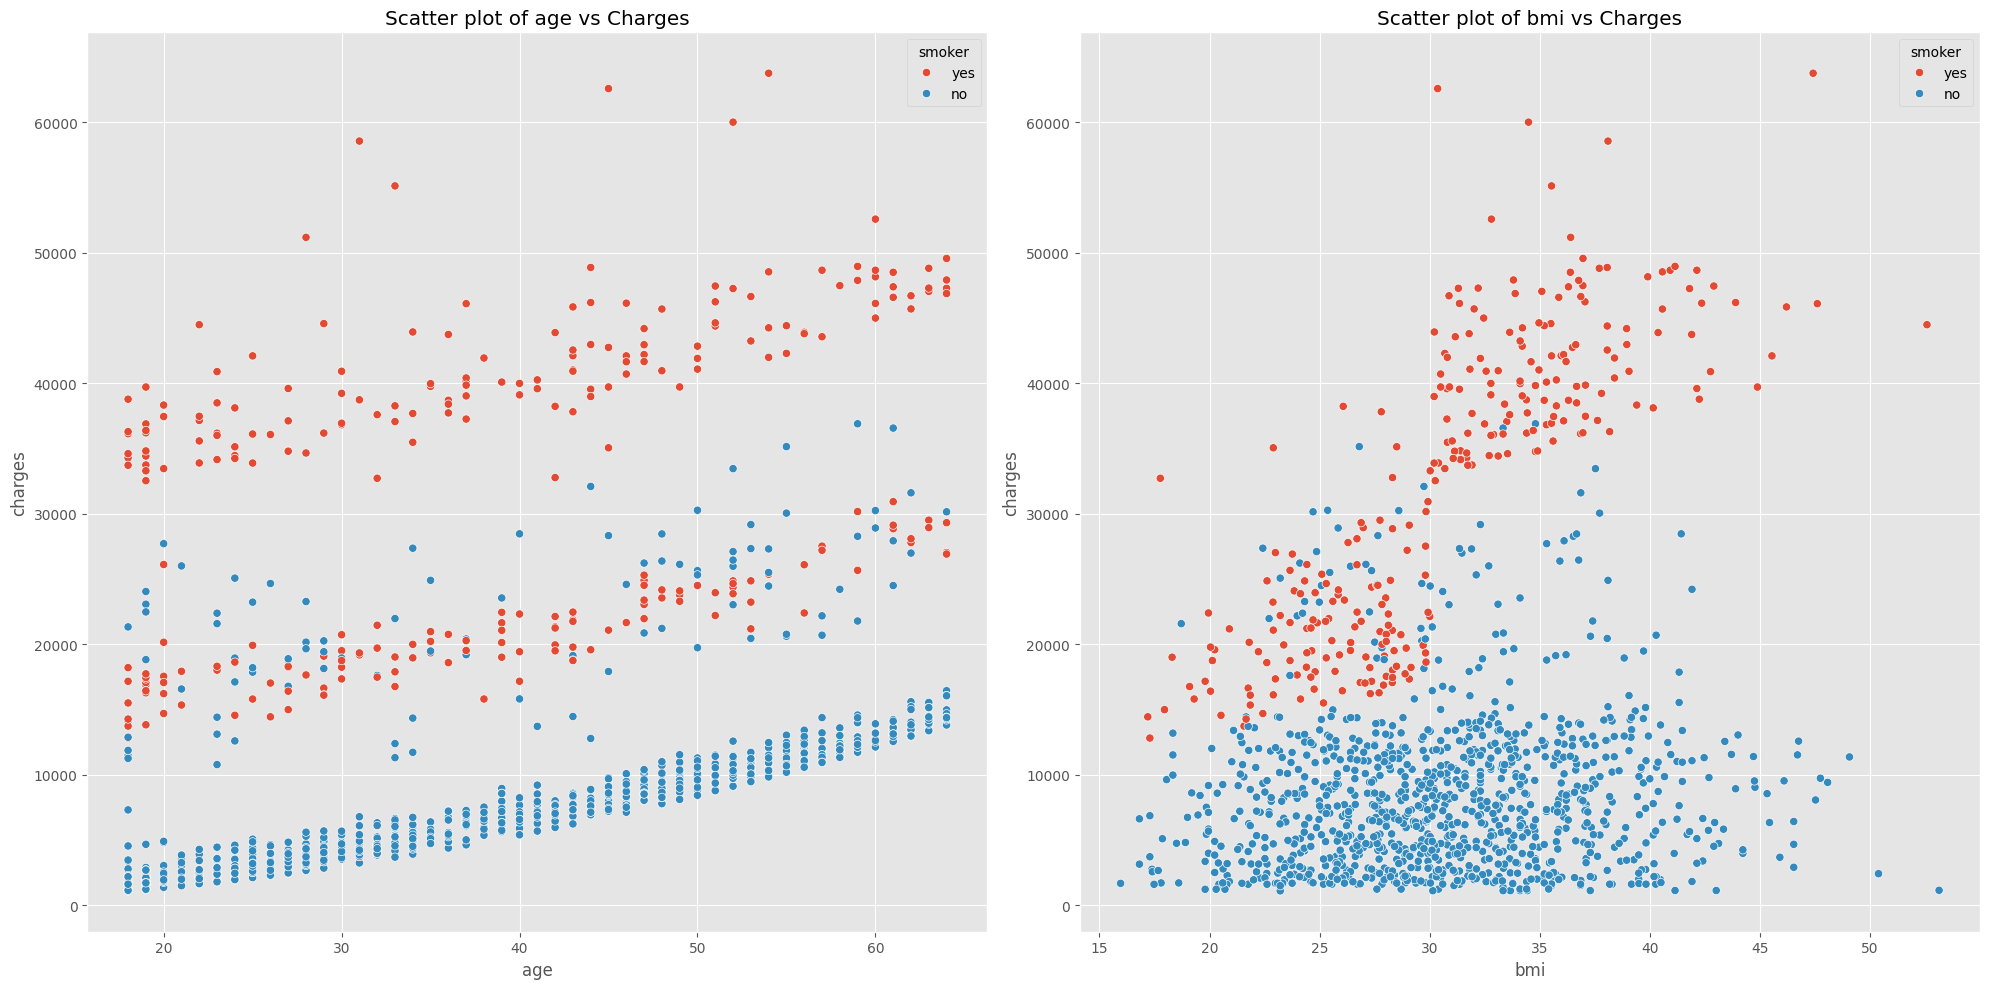

In [40]:

features = ['age', 'bmi']

# Create a single figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 

for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker', ax=axes[i])  # Assign to the correct subplot
    axes[i].set_title(f'Scatter plot of {col} vs Charges')

plt.tight_layout()  # Prevent overlapping
plt.show()

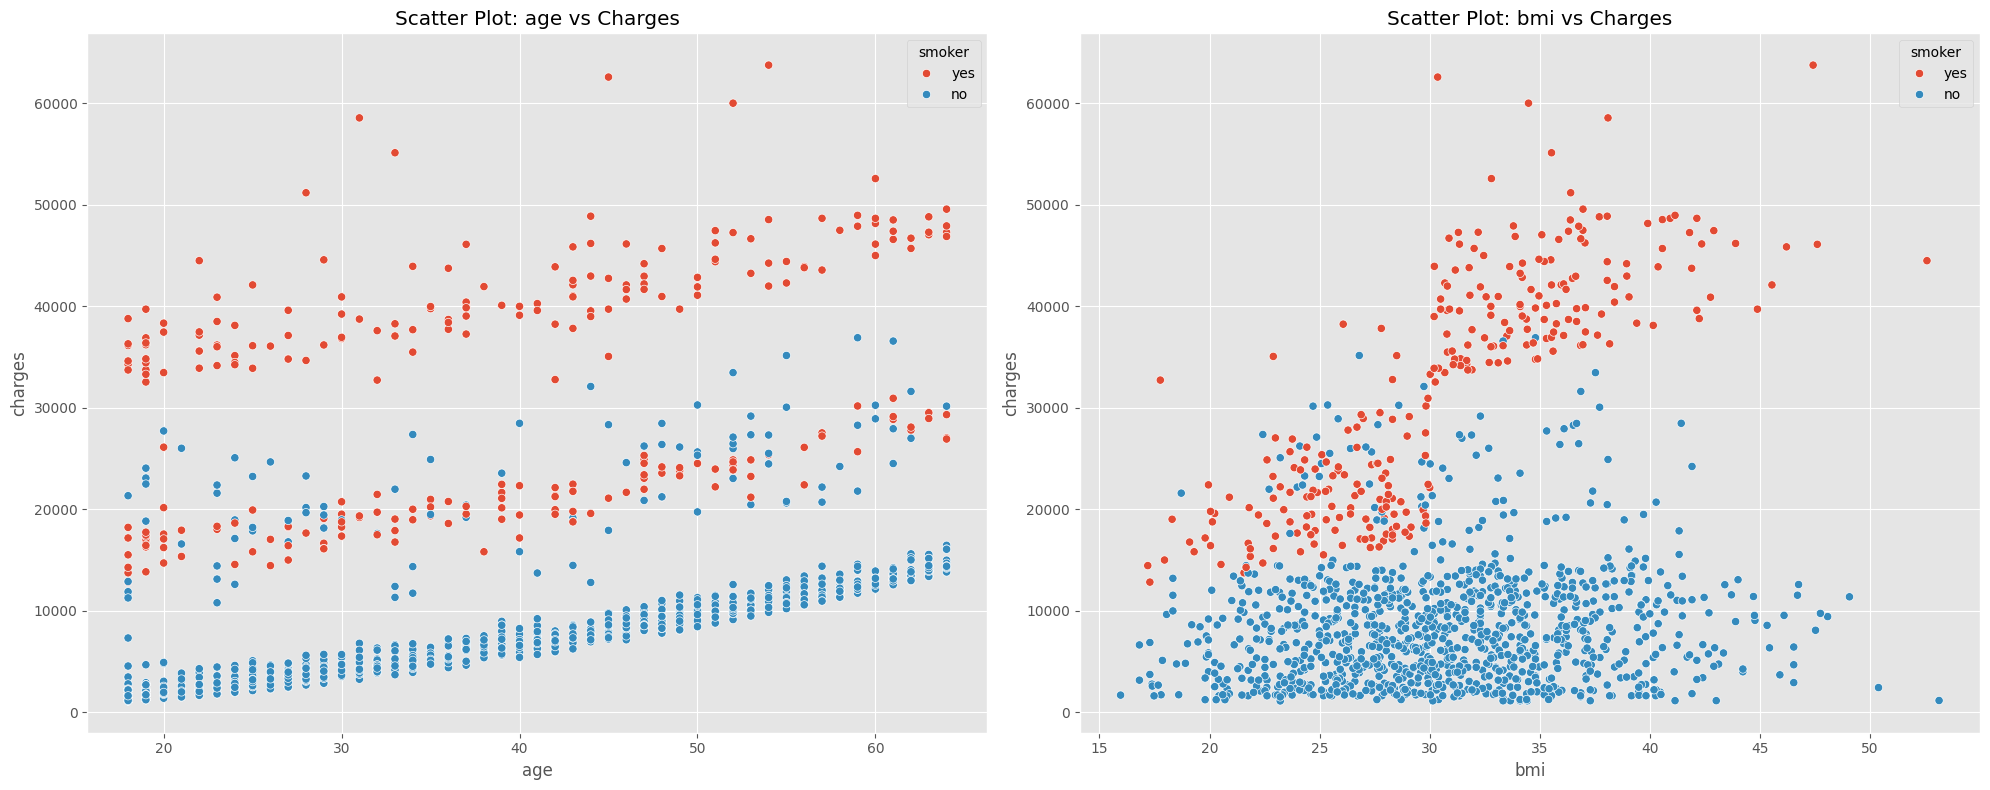

In [44]:
features = ['age', 'bmi']

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='charges', hue='smoker', ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {col} vs Charges')

plt.tight_layout()  # Prevent overlapping
plt.show()


In [45]:
df.drop_duplicates(inplace=True)

## Checking Outliers

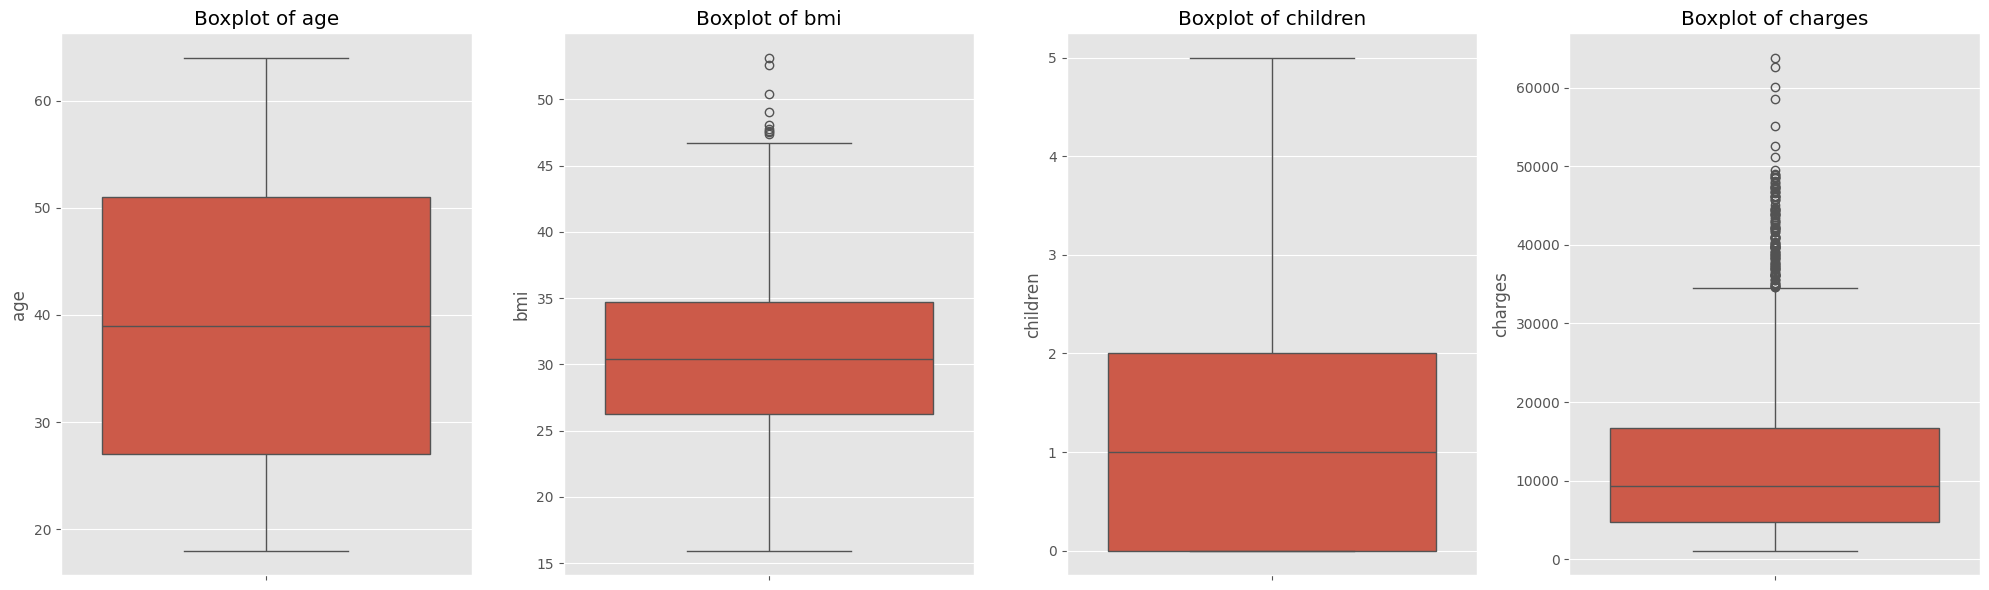

In [ ]:


# Selecting only numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [51]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 *IQR
upper_limit = Q3 + 1.5 *IQR
print(lower_limit)
print(upper_limit)

13.674999999999994
47.31500000000001


**Clearing outliers using Feature-engine**
- check out more about feature engine : https://feature-engine.trainindata.com/en/latest/

In [52]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi':13.674999999999994}, max_capping_dict={'bmi':47.31500000000001})

df[['bmi']] = arb.fit_transform(df[['bmi']])                      

<Axes: ylabel='bmi'>

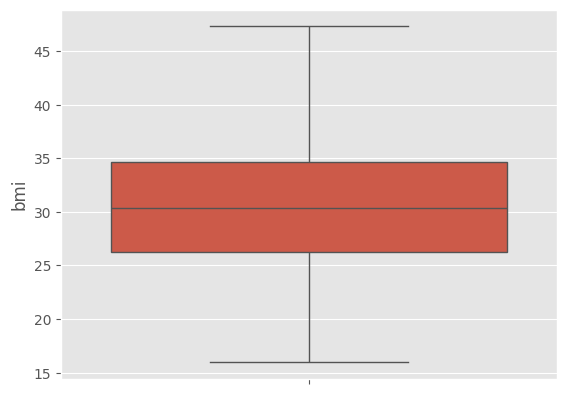

In [53]:
sns.boxplot(df['bmi'])

In [54]:
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

In [55]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [56]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [57]:
df['region'] = df['region'].map({'northwest': 0, 'northeast':1, 'southwest': 2 , 'southeast': 3 })

In [58]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.261154,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261154,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.056070,1.000000


In [82]:
X = df.drop(['charges'], axis = 1)
y = df[['charges']]

## Model Creation

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRFRegressor

## Linear Regression Model

In [84]:

l1 = []  # Train accuracy
l2 = []  # Test accuracy
l3 = []  # Cross-validation score

# Loop over random states from 40 to 49
for i in range(40, 50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # Correctly initializing the Linear Regression model
    lrmodel = LinearRegression()
    lrmodel.fit(X_train, y_train)
    
    # Store training and test accuracies
    l1.append(lrmodel.score(X_train, y_train))
    l2.append(lrmodel.score(X_test, y_test))
    
    # Compute cross-validation score
    cvs = cross_val_score(lrmodel, X, y, cv=5).mean()
    l3.append(cvs)

# Create DataFrame correctly
df1 = pd.DataFrame({'train_accuracy': l1, 'test_accuracy': l2, 'cvs': l3})


In [85]:
df1

,train_accuracy,test_accuracy,cvs
0,0.741539,0.779138,0.747
1,0.756756,0.704260,0.747
2,0.729648,0.806362,0.747
3,0.753997,0.734113,0.747
4,0.742804,0.780840,0.747
5,0.753137,0.732727,0.747
6,0.741612,0.775969,0.747
7,0.732525,0.794691,0.747
8,0.751989,0.741911,0.747
9,0.756583,0.721869,0.747


In [86]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

# Printing training and test accuracy
print("Train Accuracy:", lrmodel.score(X_train, y_train))
print("Test Accuracy:", lrmodel.score(X_test, y_test))

# Calculating cross-validation score
cvs = cross_val_score(lrmodel, X, y, cv=5).mean()
print("Cross-Validation Score:", cvs)

Train Accuracy: 0.7296475807576607
Test Accuracy: 0.8063624710782458
Cross-Validation Score: 0.7469996197062543


## Support Vector Regression (SVR)

In [106]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [107]:
from sklearn.metrics import r2_score

# Initializing and training the SVR model
svrmodel = SVR()
svrmodel.fit(X_train, y_train)

# Making predictions
ypredtrain1 = svrmodel.predict(X_train)
ypredtest1 = svrmodel.predict(X_test)


In [108]:
# Evaluating model performance
print("Train R² Score:", r2_score(y_train, ypredtrain1))
print("Test R² Score:", r2_score(y_test, ypredtest1))
print(cross_val_score(svrmodel, X, y, cv=5).mean())
print("Cross-Validation Score:", cv_score)

Train R² Score: -0.10148748315305856
Test R² Score: -0.13446030792178032
-0.1036489685171135
Cross-Validation Score: -0.10374692104571026


## Random Forest Regressor

In [109]:

# Initializing and training the Random Forest model
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(X_train, y_train)

# Making predictions
ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)

# Evaluating model performance
print("Train R² Score:", r2_score(y_train, ypredtrain2))
print("Test R² Score:", r2_score(y_test, ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5).mean())
print("Cross-Validation Score:", cv_score)


Train R² Score: 0.97240184349852
Test R² Score: 0.8716014803968515
0.8253422930306111
Cross-Validation Score: -0.10374692104571026


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Defining the model
estimator = RandomForestRegressor(random_state=42)

# Defining hyperparameter grid
param_grid = {'n_estimators': [10, 40, 50, 98, 120, 150]}  # Fixed 'n_estimators'

# Initializing GridSearchCV
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5, n_jobs=-1)  # Use n_jobs=-1 for faster computation

# Fitting the model
grid.fit(X_train, y_train)

# Printing the best parameter
print(grid.best_params_)
#print("Best Parameters:", grid.best_params_)
#print("Best R² Score:", grid.best_score_)


{'n_estimators': 98}


In [111]:
rfmodel = RandomForestRegressor(random_state=42, n_estimators=98)
rfmodel.fit(X_train, y_train)


ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)

print("Train R² Score:", r2_score(y_train, ypredtrain2))
print("Test R² Score:", r2_score(y_test, ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5).mean())
#print("Cross-Validation Score:", cv_score)

Train R² Score: 0.9722362634268154
Test R² Score: 0.8720302256561812
0.8251971579582396


In [112]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

{'learning_rate': 0.2, 'n_estimators': 19}
0.8676893659576542
0.8998417809424949
0.8597534794982347


## XGBRegressor

In [113]:
from xgboost import XGBRegressor

xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

0.9920927286148071
0.846695065498352
0.8002197861671447


In [114]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}
0.8691051602363586
0.9007425308227539
0.8606266975402832


In [100]:
features_important = pd.DataFrame(data = grid.best_estimator_.feature_importances_, index = X.columns, columns = ['Importance'])

In [101]:
features_important

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [102]:
important_features = features_important[features_important['Importance'] > 0.01]

In [103]:
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [104]:
df.drop(df[['sex', 'region']], axis = 1, inplace=True)
Xf = df.drop(df[['charges']], axis =1)
X = df.drop(df[['charges']], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size = 0.2, random_state = 42)

## Final Model

In [105]:
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.8691051602363586
0.9007425308227539
0.8606266975402832


In [115]:
import pickle
pickle.dump(finalmodel, open("model.pkl", "wb"))

In [116]:
new_data=pd.DataFrame({'age':19,'sex':'female','bmi':25.9,'children':3,'smoker':'no','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([6379.257], dtype=float32)